# Face API Sample

In [ ]:
import requests
from io import BytesIO
from PIL import Image, ImageDraw, ImageFont  # PIL = Pilow

In [ ]:
subscription_key = 'af30cb4ec2a44010a054185e92b1a7bd' # Key

In [ ]:
face_api_url = 'https://daegufaceapi.cognitiveservices.azure.com/face/v1.0/detect' # 엔드포인트

In [ ]:
image_url = 'https://www.ulsanfocus.com/wp-content/uploads/2021/05/Butter-of-BTS-s-Song-%EC%9A%B0%EB%A6%AC%EA%B0%80-%EC%A7%80%EA%B8%88%EA%B9%8C%EC%A7%80-%EC%95%8C%EA%B3%A0%EC%9E%88%EB%8A%94-%EB%AA%A8%EB%93%A0.jpg'

In [ ]:
img = Image.open(BytesIO(requests.get(image_url).content))

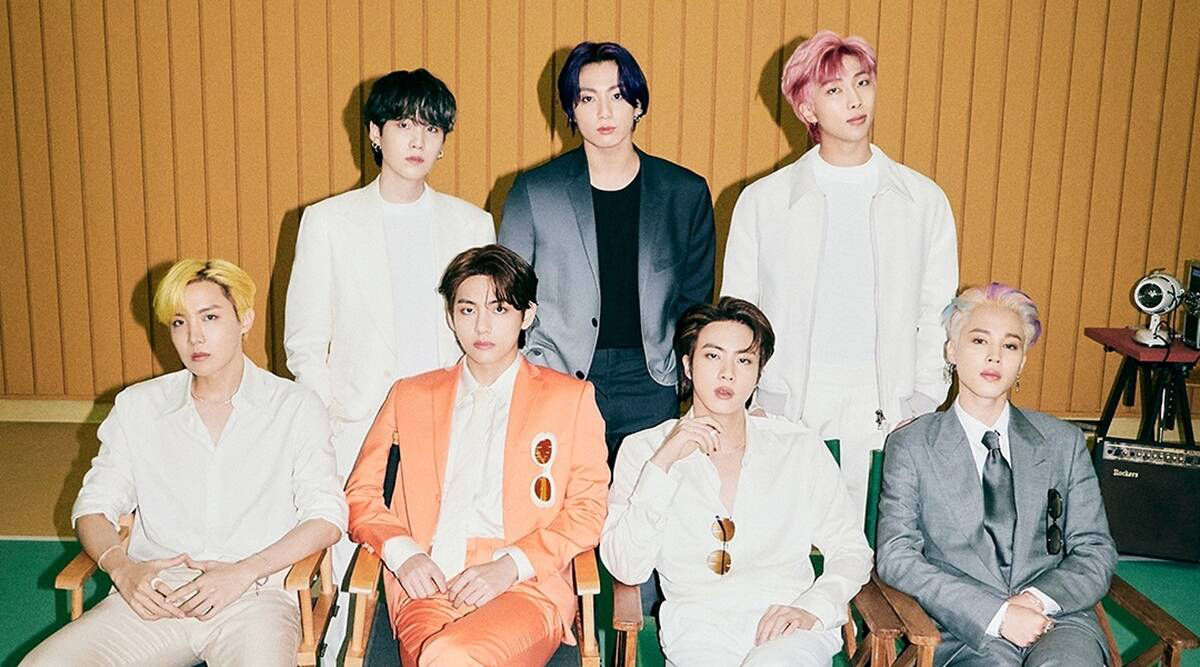

In [ ]:
img

In [ ]:
headers = {'Ocp-Apim-Subscription-Key':subscription_key}

In [ ]:
params = {
    'returnFaceId' : 'true',
    'returnFacelandmarks' : 'false', #자료와 좌표가 너무 많이 나오기에 false 로 설정
    'returnFaceAttributes' : 'age,gender,emotion'  #속성, 가지고 있는 값 - 나이와 성별만 가지고 옴
}

In [ ]:
data = {'url': image_url}

In [ ]:
response = requests.post(face_api_url, params = params, headers = headers, json = data)

In [ ]:
faces = response.json()

In [ ]:
faces # faceId : 각각의 사람을 구별하기 위해 고유 ID(난수)를 부여
      # faceRectangle(얼굴 인식 사각형)

[{'faceAttributes': {'age': 26.0,
   'emotion': {'anger': 0.0,
    'contempt': 0.0,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 0.0,
    'neutral': 0.998,
    'sadness': 0.002,
    'surprise': 0.0},
   'gender': 'male'},
  'faceId': '5348c800-ab38-4908-8696-aa41bad52187',
  'faceRectangle': {'height': 71, 'left': 161, 'top': 302, 'width': 71}},
 {'faceAttributes': {'age': 23.0,
   'emotion': {'anger': 0.005,
    'contempt': 0.004,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 0.0,
    'neutral': 0.989,
    'sadness': 0.001,
    'surprise': 0.0},
   'gender': 'male'},
  'faceId': 'c48705d5-37f8-4e89-95c3-66699006def0',
  'faceRectangle': {'height': 69, 'left': 449, 'top': 292, 'width': 69}},
 {'faceAttributes': {'age': 24.0,
   'emotion': {'anger': 0.0,
    'contempt': 0.001,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 0.0,
    'neutral': 0.997,
    'sadness': 0.002,
    'surprise': 0.001},
   'gender': 'male'},
  'faceId': '8939b561-9d9e-423b-bd46-6628298839

## 얼굴 이정표
[얼굴이정표](https://docs.microsoft.com/ko-kr/azure/cognitive-services/face/concepts/face-detection)

![얼굴이정표](https://docs.microsoft.com/ko-kr/azure/cognitive-services/face/images/landmarks.1.jpg)

In [ ]:
def CreateImage(faces):

    for face in faces:

        #사각형을 출력하기 위한 부분
        rect = face['faceRectangle']
        top = rect['top']
        left = rect['left']
        bottom = rect['height'] + top
        right = rect['width'] + left

        draw.rectangle(((left,top),(right,bottom)), outline = 'red', width = 3)

        #글씨를 쓰기 위한 부분
        fontX = left
        fontY = top - 30

        face_info = face['faceAttributes']
        gender = face_info['gender']
        age = face_info['age']
        result = 'Gender: {0}\nAge: {1}'.format(gender,age)  # .format(gender = 0, age = 1)

        draw.text((fontX, fontY), result, fill = 'red')

In [ ]:
draw = ImageDraw.Draw(img)

In [ ]:
CreateImage(faces)

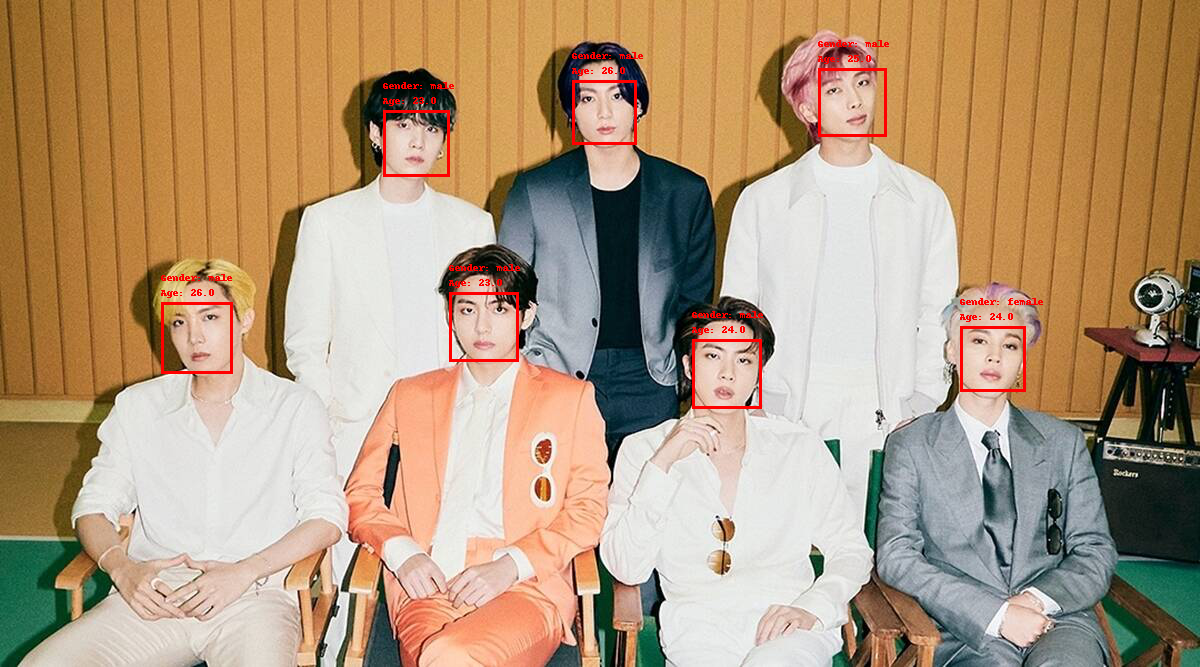

In [ ]:
img